## Neural network, experimentation tool, version 2

EDIT: the scaling is now done separately for independent support variables and the target. The model works a bit better now.

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# activation functions
# ReLu is very simple, it filters out all negative values
# this is a powerful activation function in reality
def activation_ReLu(number):
    if number > 0:
        return number
    else:
        return 0


# we also need a derivated version of ReLu
# otherwise same as original, but instead of original value, return 1 instead
def activation_ReLu_partial_derivative(number):
    if number > 0:
        return 1
    else:
        return 0

In [176]:
# lock down the randomness in order to get same results everytime
# you can change or disable this if you want
np.random.seed(123)

def generate_train_data():
    result = []

    # create 100 numbers
    for x in range(100):
        n1 = np.random.randint(0, 20)
        n2 = np.random.randint(0, 50)


        n3 = n1 ** 2 + n2 + np.random.randint(0, 10)
        n3 = int(n3)

        result.append([n1, n2, n3])


    return result


In [177]:
generate_train_data()

[[13, 2, 173],
 [6, 17, 56],
 [10, 22, 123],
 [0, 49, 58],
 [0, 46, 46],
 [15, 25, 253],
 [14, 36, 232],
 [16, 4, 261],
 [3, 2, 15],
 [7, 2, 55],
 [15, 48, 280],
 [9, 35, 120],
 [6, 33, 74],
 [2, 33, 45],
 [3, 42, 56],
 [0, 11, 13],
 [10, 22, 124],
 [4, 15, 35],
 [6, 45, 84],
 [16, 6, 266],
 [7, 11, 66],
 [7, 1, 55],
 [18, 20, 352],
 [17, 12, 303],
 [17, 1, 293],
 [12, 41, 185],
 [17, 22, 314],
 [3, 11, 25],
 [7, 41, 92],
 [3, 11, 23],
 [19, 30, 397],
 [9, 23, 110],
 [19, 6, 373],
 [6, 17, 56],
 [3, 1, 10],
 [5, 40, 71],
 [14, 15, 219],
 [13, 49, 218],
 [3, 29, 39],
 [19, 4, 372],
 [6, 1, 41],
 [12, 3, 150],
 [7, 38, 95],
 [6, 13, 53],
 [4, 48, 64],
 [8, 24, 92],
 [13, 13, 190],
 [14, 6, 203],
 [6, 40, 83],
 [10, 12, 121],
 [10, 49, 156],
 [13, 44, 214],
 [9, 14, 103],
 [1, 3, 5],
 [14, 23, 224],
 [1, 37, 40],
 [18, 46, 379],
 [3, 18, 33],
 [9, 17, 101],
 [11, 26, 155],
 [11, 10, 134],
 [13, 23, 201],
 [14, 3, 202],
 [14, 21, 223],
 [16, 23, 286],
 [4, 4, 25],
 [16, 9, 267],
 [5, 33, 6

In [178]:
#use generated training data from our helper function
# data = generate_train_data()
# df = pd.DataFrame(data, columns=["x1", "x2", "y"])
df = pd.read_csv("medical_insurance.csv")
df = df[["age", "bmi", "charges"]]
#df = df[:500]
df

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
2767,47,45.320,8569.86180
2768,21,34.600,2020.17700
2769,19,26.030,16450.89470
2770,23,18.715,21595.38229


In [179]:
# initialize weights and biases
# in Keras/TensorFlow/PyTorch etc. these are usually randomized in the beginning
w1 = np.random.normal(0, 1.5)
w2 = np.random.normal(0, 1.5)
w3 = np.random.normal(0, 1.5)
w4 = np.random.normal(0, 1.5)
w5 = np.random.normal(0, 1.5)
w6 = np.random.normal(0, 1.5)
bias1 = np.random.normal(0, 1.5)
bias2 = np.random.normal(0, 1.5)
bias3 = np.random.normal(0, 1.5)

# just for comparison after the training
original_w1 = w1
original_w2 = w2
original_w3 = w3
original_w4 = w4
original_w5 = w5
original_w6 = w6
original_b1 = bias1
original_b2 = bias2
original_b3 = bias3

# DataFrame values as a list
# data = list(df.values)
data = df.values

# use min/max -scaling to make values in the range 0-1

# independent support variables => indeces 0 and 1 (X)
# target variable => index 2 (y)
X = data[:, :2]
y = data[:, 2:]

# Scale X and y
X_scaled = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
y_scaled = (y - np.min(y, axis=0)) / (np.max(y, axis=0) - np.min(y, axis=0))

# combine back to original data format
data = np.hstack((X_scaled, y_scaled))



# learning rate
LR = 0.005
epochs = 300

# let's initalize a list for loss visualizations
loss_points = []

for epoch in range(epochs):

    # the previous version only measured the loss value
    # of the last calculation done in the code (node 3)
    # it's probably better to measure the average loss for each epoch
    epoch_losses = []

    for row in data:
        # this is where we do Forward pass + backpropagation
        input1 = row[0]
        input2 = row[1]
        true_value = row[2]

        pre_node1 = input1 * w1 + input2 * w3 + bias1
        pre_node2 = input1 * w2 + input2 * w4 + bias2

        # NODE 1 OUTPUT
        node_1_output = activation_ReLu(pre_node1)
        node_1_output

        # NODE 2 OUTPUT
        node_2_output = activation_ReLu(pre_node2)
        node_2_output

        # NODE 3 OUTPUT
        # we can just use Node 1 and 2 outputs, since they
        # already contain the previous weights in their result
        node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
        node_3_output = activation_ReLu(node_3_output)
        node_3_output

        # LOSS FUNCTION - we are going to use MSE -> mean squared error
        # MSE formula for LOSS => (predicted_value - true_value) ^ 2
        predicted_value = node_3_output
        loss = (predicted_value - true_value) ** 2

        # add current loss into epoch losses -list
        epoch_losses.append(loss)
        
        # BACKPROPAGATION - LAST LAYER FIRST
        # solving the partial derivative of the loss function with respect to w5
        deriv_L_w5 = 2 * node_1_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w5 = w5 - LR * deriv_L_w5

        deriv_L_w6 = 2 * node_2_output * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_w6 = w6 - LR * deriv_L_w6

        deriv_L_b3 = 2 * 1 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        new_b3 = bias3 - LR * deriv_L_b3

        # BACKPROPAGATION - THE FIRST LAYER
        # FROM THIS POINT ONWARD WE HAVE TO USE THE MORE COMPLEX VERSION
        # OF UPDATING THE VALUES => CHAIN RULE

        # weight 1
        deriv_L_w1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w1_right = activation_ReLu_partial_derivative(pre_node1) * input1
        deriv_L_w1 = deriv_L_w1_left * deriv_L_w1_right
        new_w1 = w1 - LR * deriv_L_w1

        deriv_L_w2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w2_right = activation_ReLu_partial_derivative(pre_node2) * input1
        deriv_L_w2 = deriv_L_w2_left * deriv_L_w2_right
        new_w2 = w2 - LR * deriv_L_w2

        deriv_L_w3_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w3_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * input2
        deriv_L_w3 = deriv_L_w3_left * deriv_L_w3_right
        new_w3 = w3 - LR * deriv_L_w3

        deriv_L_w4_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_w4_right = activation_ReLu_partial_derivative(pre_node2) * input2
        deriv_L_w4 = deriv_L_w4_left * deriv_L_w4_right
        new_w4 = w4 - LR * deriv_L_w4

        deriv_L_b1_left = 2 * w5 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b1_right = activation_ReLu_partial_derivative(input1 * w1 + input2 * w3 + bias1) * 1
        deriv_L_b1 = deriv_L_b1_left * deriv_L_b1_right
        new_b1 = bias1 - LR * deriv_L_b1

        deriv_L_b2_left = 2 * w6 * (node_1_output * w5 + node_2_output * w6 + bias3 - true_value)
        deriv_L_b2_right = activation_ReLu_partial_derivative(pre_node2) * 1
        deriv_L_b2 = deriv_L_b2_left * deriv_L_b2_right
        new_b2 = bias2 - LR * deriv_L_b2

        # ALL DONE! FINALLY UPDATE THE EXISTING WEIGHTS
        w1 = new_w1
        w2 = new_w2
        w3 = new_w3
        w4 = new_w4
        w5 = new_w5
        w6 = new_w6
        bias1 = new_b1
        bias2 = new_b2
        bias3 = new_b3

    # calculate average epoch-wise loss and add it to loss points
    average_loss = sum(epoch_losses) / len(epoch_losses)

    # place the overall epoch loss into the loss_points list
    loss_points.append(average_loss)
    print(f"Epoch: {epoch + 1}, loss: {average_loss}")
        

Epoch: 1, loss: 0.046618627060119065
Epoch: 2, loss: 0.03846307578944744
Epoch: 3, loss: 0.037983465008530476
Epoch: 4, loss: 0.03786745154886213
Epoch: 5, loss: 0.03782132243088398
Epoch: 6, loss: 0.03780183036154379
Epoch: 7, loss: 0.03779497378699052
Epoch: 8, loss: 0.03779045949247771
Epoch: 9, loss: 0.037786117623761
Epoch: 10, loss: 0.03778335625206463
Epoch: 11, loss: 0.03778079994076388
Epoch: 12, loss: 0.0377780861542083
Epoch: 13, loss: 0.03777537028037886
Epoch: 5, loss: 0.03782132243088398
Epoch: 6, loss: 0.03780183036154379
Epoch: 7, loss: 0.03779497378699052
Epoch: 8, loss: 0.03779045949247771
Epoch: 9, loss: 0.037786117623761
Epoch: 10, loss: 0.03778335625206463
Epoch: 11, loss: 0.03778079994076388
Epoch: 12, loss: 0.0377780861542083
Epoch: 13, loss: 0.03777537028037886
Epoch: 14, loss: 0.03777280084415057
Epoch: 15, loss: 0.037770302489461546
Epoch: 16, loss: 0.03776802808158401
Epoch: 17, loss: 0.037766764418037835
Epoch: 18, loss: 0.037765677388059894
Epoch: 19, loss:

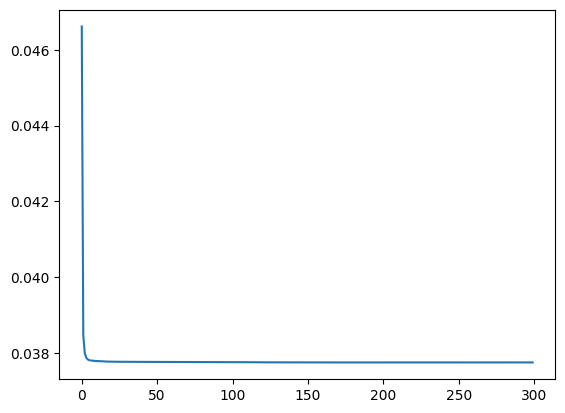

In [180]:
plt.plot(loss_points)
# plt.ylim(-1, 5)
plt.show()



In [181]:
print("ORIGINAL WEIGHTS AND BIASES")
print(f"w1: {original_w1}")
print(f"w2: {original_w2}")
print(f"w3: {original_w3}")
print(f"w4: {original_w4}")
print(f"w5: {original_w5}")
print(f"w6: {original_w6}")
print(f"b1: {original_b1}")
print(f"b2: {original_b2}")
print(f"b3: {original_b3}")

print("\n\n#################################\n\n")

print("NEW WEIGHTS AND BIASES")
print(f"w1: {new_w1}")
print(f"w2: {new_w2}")
print(f"w3: {new_w3}")
print(f"w4: {new_w4}")
print(f"w5: {new_w5}")
print(f"w6: {new_w6}")
print(f"b1: {new_b1}")
print(f"b2: {new_b2}")
print(f"b3: {new_b3}")



ORIGINAL WEIGHTS AND BIASES
w1: 2.093029394635432
w2: -0.5384038893633919
w3: -0.8229631922792975
w4: -3.8355819061017877
w5: -0.8233806199833301
w6: -1.4670865591264255
b1: -0.532236687142228
b2: 0.5873763635251666
b3: 0.26578849379848185


#################################


NEW WEIGHTS AND BIASES
w1: 1.432337674416812
w2: -0.36985185551358646
w3: -1.0692113954409057
w4: -3.7445529766395422
w5: -0.2470135634622536
w6: -1.0172445915713295
b1: -1.2372961762045476
b2: 0.29447021375399324
b3: 0.19440604236398712


In [182]:
# prediction function, just doing the forward pass
# again (but only that)
def predict(x1, x2):
    input1 = x1
    input2 = x2

    # NODE 1 OUTPUT
    node_1_output = input1 * w1 + input2 * w3 + bias1
    node_1_output = activation_ReLu(node_1_output)

    # NODE 2 OUTPUT
    node_2_output = input1 * w2 + input2 * w4 + bias2
    node_2_output = activation_ReLu(node_2_output)

    # NODE 3 OUTPUT
    # we can just use Node 1 and 2 outputs, since they
    # already contain the previous weights in their result
    node_3_output = node_1_output * w5 + node_2_output * w6 + bias3
    node_3_output = activation_ReLu(node_3_output)
    return node_3_output

   

In [183]:
df

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
2767,47,45.320,8569.86180
2768,21,34.600,2020.17700
2769,19,26.030,16450.89470
2770,23,18.715,21595.38229


In [184]:
# index 543 is one of the biggest charges in the data
#df.iloc[543]

In [185]:
# np.set_printoptions(precision=12, suppress=True)

In [186]:
# scaled values
#data[543]

In [187]:
# $ ~63770 
df['charges'].max() * 1

np.float64(63770.42801)

In [188]:
# try using the model with our prediction function
# the value tends to be same as final bias 3
# so if node1 and node2 outputs are small => more or less bias3
result = predict(0.7826087 , 0.84611246)
result

np.float64(0.19440604236398712)

In [189]:
df['charges'].max() * result

# estimated $ ~22335 USD, heavily undershoots

np.float64(12397.356529281651)

In [190]:
# just checking if the value revolves around the average...
df.describe()

,age,bmi,charges
count,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,13261.369959
std,14.081459,6.129449,12151.768945
min,18.000000,15.960000,1121.873900
25%,26.000000,26.220000,4687.797000
50%,39.000000,30.447500,9333.014350
75%,51.000000,34.770000,16577.779500
max,64.000000,53.130000,63770.428010


In [191]:
# Generate predictions for all data points and calculate metrics
predictions_scaled = []
true_values_scaled = []

test_data = data[int(len(data)*0.75):]

for row in data:
    input1 = row[0]
    input2 = row[1]
    true_value = row[2]
    
    prediction = predict(input1, input2)
    predictions_scaled.append(prediction)
    true_values_scaled.append(true_value)

predictions_scaled = np.array(predictions_scaled)
true_values_scaled = np.array(true_values_scaled)

# Denormalize predictions and true values back to original scale
y_min = np.min(y)
y_max = np.max(y)

predictions_original = predictions_scaled * (y_max - y_min) + y_min
true_values_original = true_values_scaled * (y_max - y_min) + y_min

# Calculate metrics
mse_scaled = np.mean((predictions_scaled - true_values_scaled) ** 2)
rmse_scaled = np.sqrt(mse_scaled)
mae_scaled = np.mean(np.abs(predictions_scaled - true_values_scaled))

mse_original = np.mean((predictions_original - true_values_original) ** 2)
rmse_original = np.sqrt(mse_original)
mae_original = np.mean(np.abs(predictions_original - true_values_original))

# R² Score
ss_res = np.sum((true_values_original - predictions_original) ** 2)
ss_tot = np.sum((true_values_original - np.mean(true_values_original)) ** 2)
r2_score = 1 - (ss_res / ss_tot)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((true_values_original - predictions_original) / true_values_original)) * 100

print("=" * 60)
print("MODEL PERFORMANCE METRICS")
print("=" * 60)
print("\nSCALED VALUES (0-1 range):")
print(f"  MSE (Mean Squared Error):  {mse_scaled:.6f}")
print(f"  RMSE (Root Mean Squared Error): {rmse_scaled:.6f}")
print(f"  MAE (Mean Absolute Error): {mae_scaled:.6f}")

print("\nORIGINAL VALUES (Insurance charges in USD):")
print(f"  MSE:  ${mse_original:,.2f}")
print(f"  RMSE: ${rmse_original:,.2f}")
print(f"  MAE:  ${mae_original:,.2f}")

print("\nMODEL QUALITY METRICS:")
print(f"  R² Score: {r2_score:.6f}")
print(f"  MAPE (Mean Absolute Percentage Error): {mape:.2f}%")

print("\nDATA STATISTICS:")
print(f"  Mean charge: ${np.mean(true_values_original):,.2f}")
print(f"  Min charge:  ${np.min(true_values_original):,.2f}")
print(f"  Max charge:  ${np.max(true_values_original):,.2f}")
print(f"  Std Dev:     ${np.std(true_values_original):,.2f}")

print("\nPREDICTION STATISTICS:")
print(f"  Mean prediction: ${np.mean(predictions_original):,.2f}")
print(f"  Min prediction:  ${np.min(predictions_original):,.2f}")
print(f"  Max prediction:  ${np.max(predictions_original):,.2f}")
print(f"  Std Dev:         ${np.std(predictions_original):,.2f}")
print("=" * 60)


MODEL PERFORMANCE METRICS

SCALED VALUES (0-1 range):
  MSE (Mean Squared Error):  0.037479
  RMSE (Root Mean Squared Error): 0.193595
  MAE (Mean Absolute Error): 0.145397

ORIGINAL VALUES (Insurance charges in USD):
  MSE:  $147,098,568.29
  RMSE: $12,128.42
  MAE:  $9,108.88

MODEL QUALITY METRICS:
  R² Score: 0.003480
  MAPE (Mean Absolute Percentage Error): 152.21%

DATA STATISTICS:
  Mean charge: $13,261.37
  Min charge:  $1,121.87
  Max charge:  $63,770.43
  Std Dev:     $12,149.58

PREDICTION STATISTICS:
  Mean prediction: $13,239.18
  Min prediction:  $1,121.87
  Max prediction:  $13,301.13
  Std Dev:         $716.04


## Keras Model - Same Architecture for Comparison

In [192]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Build Keras model with same architecture as handmade model
# Input: 2 neurons (age, bmi)
# Hidden layer: 2 neurons with ReLU activation
# Output: 1 neuron with ReLU activation
keras_model = keras.Sequential([
    layers.Dense(2, activation='relu', input_shape=(2,)),  # Hidden layer with 2 neurons
    layers.Dense(1, activation='relu')  # Output layer
])

# Compile with MSE loss and Adam optimizer (similar learning rate)
keras_model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate=0.005)
)

# Prepare the data for Keras
X_train = X_scaled  # Shape: (2772, 2)
y_train = y_scaled  # Shape: (2772, 1)

# Train the model for the same number of epochs
# Using batch_size=32 for practical training speed
history = keras_model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,  # Use batches for faster training
    verbose=0  # Suppress output
)

print("Keras model training complete!")


c:\Users\zsolt\OneDrive - Óbudai egyetem\Deep Learning\deeplearning\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Keras model training complete!


In [193]:
# Get predictions from Keras model
keras_predictions_scaled = keras_model.predict(X_train, verbose=0)
keras_predictions_scaled = keras_predictions_scaled.flatten()

# Denormalize Keras predictions
keras_predictions_original = keras_predictions_scaled * (y_max - y_min) + y_min

# Calculate Keras metrics
keras_mse_scaled = np.mean((keras_predictions_scaled - true_values_scaled) ** 2)
keras_rmse_scaled = np.sqrt(keras_mse_scaled)
keras_mae_scaled = np.mean(np.abs(keras_predictions_scaled - true_values_scaled))

keras_mse_original = np.mean((keras_predictions_original - true_values_original) ** 2)
keras_rmse_original = np.sqrt(keras_mse_original)
keras_mae_original = np.mean(np.abs(keras_predictions_original - true_values_original))

# R² Score for Keras
keras_ss_res = np.sum((true_values_original - keras_predictions_original) ** 2)
keras_ss_tot = np.sum((true_values_original - np.mean(true_values_original)) ** 2)
keras_r2_score = 1 - (keras_ss_res / keras_ss_tot)

# MAPE for Keras
keras_mape = np.mean(np.abs((true_values_original - keras_predictions_original) / true_values_original)) * 100

print("=" * 60)
print("KERAS MODEL PERFORMANCE METRICS")
print("=" * 60)
print("\nSCALED VALUES (0-1 range):")
print(f"  MSE (Mean Squared Error):  {keras_mse_scaled:.6f}")
print(f"  RMSE (Root Mean Squared Error): {keras_rmse_scaled:.6f}")
print(f"  MAE (Mean Absolute Error): {keras_mae_scaled:.6f}")

print("\nORIGINAL VALUES (Insurance charges in USD):")
print(f"  MSE:  ${keras_mse_original:,.2f}")
print(f"  RMSE: ${keras_rmse_original:,.2f}")
print(f"  MAE:  ${keras_mae_original:,.2f}")

print("\nMODEL QUALITY METRICS:")
print(f"  R² Score: {keras_r2_score:.6f}")
print(f"  MAPE (Mean Absolute Percentage Error): {keras_mape:.2f}%")

print("\nPREDICTION STATISTICS:")
print(f"  Mean prediction: ${np.mean(keras_predictions_original):,.2f}")
print(f"  Min prediction:  ${np.min(keras_predictions_original):,.2f}")
print(f"  Max prediction:  ${np.max(keras_predictions_original):,.2f}")
print(f"  Std Dev:         ${np.std(keras_predictions_original):,.2f}")
print("=" * 60)


KERAS MODEL PERFORMANCE METRICS

SCALED VALUES (0-1 range):
  MSE (Mean Squared Error):  0.033240
  RMSE (Root Mean Squared Error): 0.182317
  MAE (Mean Absolute Error): 0.142523

ORIGINAL VALUES (Insurance charges in USD):
  MSE:  $130,460,181.80
  RMSE: $11,421.92
  MAE:  $8,928.87

MODEL QUALITY METRICS:
  R² Score: 0.116197
  MAPE (Mean Absolute Percentage Error): 114.17%

PREDICTION STATISTICS:
  Mean prediction: $12,950.27
  Min prediction:  $5,834.57
  Max prediction:  $23,529.87
  Std Dev:         $4,046.69


In [194]:
## Comparison: Handmade vs Keras Model

# Create comparison dataframe
comparison_data = {
    'Metric': [
        'MSE (scaled)',
        'RMSE (scaled)',
        'MAE (scaled)',
        'MSE (original)',
        'RMSE (original)',
        'MAE (original)',
        'R² Score',
        'MAPE (%)',
        'Mean Prediction ($)',
        'Std Dev ($)'
    ],
    'Handmade Model': [
        f"{mse_scaled:.6f}",
        f"{rmse_scaled:.6f}",
        f"{mae_scaled:.6f}",
        f"${mse_original:,.2f}",
        f"${rmse_original:,.2f}",
        f"${mae_original:,.2f}",
        f"{r2_score:.6f}",
        f"{mape:.2f}%",
        f"${np.mean(predictions_original):,.2f}",
        f"${np.std(predictions_original):,.2f}"
    ],
    'Keras Model': [
        f"{keras_mse_scaled:.6f}",
        f"{keras_rmse_scaled:.6f}",
        f"{keras_mae_scaled:.6f}",
        f"${keras_mse_original:,.2f}",
        f"${keras_rmse_original:,.2f}",
        f"${keras_mae_original:,.2f}",
        f"{keras_r2_score:.6f}",
        f"{keras_mape:.2f}%",
        f"${np.mean(keras_predictions_original):,.2f}",
        f"${np.std(keras_predictions_original):,.2f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n")
print("=" * 90)
print("DETAILED COMPARISON: HANDMADE vs KERAS MODEL")
print("=" * 90)
print(comparison_df.to_string(index=False))
print("=" * 90)

# Calculate improvements
print("\nKERAS IMPROVEMENTS OVER HANDMADE:")
r2_improvement = keras_r2_score - r2_score
rmse_improvement_pct = ((rmse_original - keras_rmse_original) / rmse_original) * 100
mae_improvement_pct = ((mae_original - keras_mae_original) / mae_original) * 100
mape_improvement_pct = ((mape - keras_mape) / mape) * 100

print(f"  R² Score improvement: {r2_improvement:+.6f}")
print(f"  RMSE improvement: {rmse_improvement_pct:+.2f}%")
print(f"  MAE improvement: {mae_improvement_pct:+.2f}%")
print(f"  MAPE improvement: {mape_improvement_pct:+.2f}%")




DETAILED COMPARISON: HANDMADE vs KERAS MODEL
             Metric  Handmade Model     Keras Model
       MSE (scaled)        0.037479        0.033240
      RMSE (scaled)        0.193595        0.182317
       MAE (scaled)        0.145397        0.142523
     MSE (original) $147,098,568.29 $130,460,181.80
    RMSE (original)      $12,128.42      $11,421.92
     MAE (original)       $9,108.88       $8,928.87
           R² Score        0.003480        0.116197
           MAPE (%)         152.21%         114.17%
Mean Prediction ($)      $13,239.18      $12,950.27
        Std Dev ($)         $716.04       $4,046.69

KERAS IMPROVEMENTS OVER HANDMADE:
  R² Score improvement: +0.112717
  RMSE improvement: +5.83%
  MAE improvement: +1.98%
  MAPE improvement: +24.99%
